In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [84]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [85]:
print(len(train_data))
print(train_data.isna().sum())

1200000
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


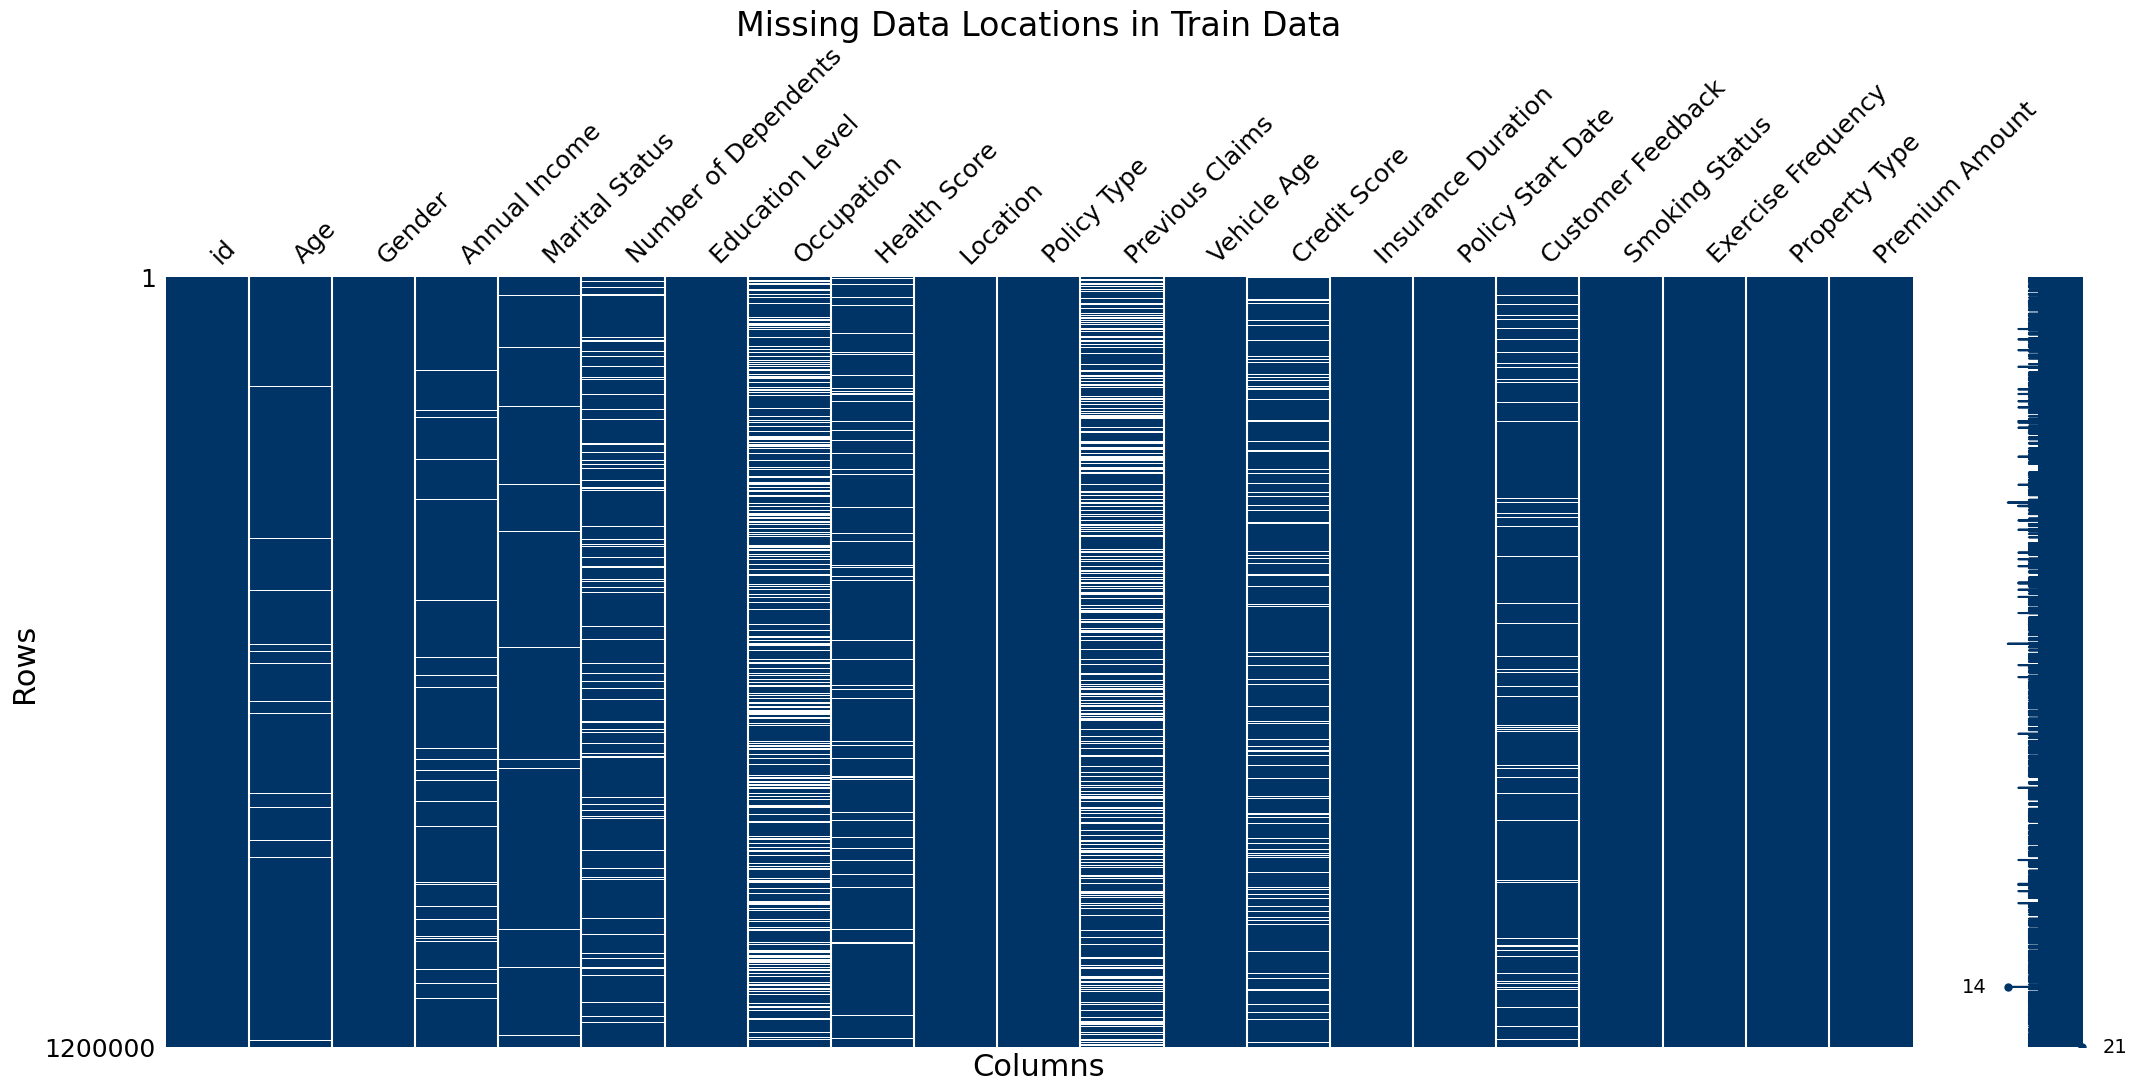

In [86]:
msno.matrix(df=train_data, color=(0.0, 0.2, 0.4))

plt.title('Missing Data Locations in Train Data', fontsize=24)
plt.xlabel('Columns', fontsize=22)
plt.ylabel('Rows', fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [87]:
train_object_cols = train_data.select_dtypes(include=['object']).columns
for col in train_object_cols:
    train_data[col] = train_data[col].astype('category')
    
test_object_cols = test_data.select_dtypes(include=['object']).columns
for col in test_object_cols:
    test_data[col] = test_data[col].astype('category')
train_data.dtypes

id                         int64
Age                      float64
Gender                  category
Annual Income            float64
Marital Status          category
Number of Dependents     float64
Education Level         category
Occupation              category
Health Score             float64
Location                category
Policy Type             category
Previous Claims          float64
Vehicle Age              float64
Credit Score             float64
Insurance Duration       float64
Policy Start Date       category
Customer Feedback       category
Smoking Status          category
Exercise Frequency      category
Property Type           category
Premium Amount           float64
dtype: object

In [88]:
def extract_datetime_features(df):

    datetime_columns = df.select_dtypes(include=['category']).columns

    for col in datetime_columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='raise')

            df[f'{col}_epoch'] = df[col].astype(np.int64) / 10**9

            df[f'{col}_year'] = df[col].dt.year.astype('float64')
            df[f'{col}_month'] = df[col].dt.month.astype('float64')
            df[f'{col}_day'] = df[col].dt.day.astype('float64')
            df[f'{col}_day_of_week'] = df[col].dt.dayofweek.astype('float64')
            df[f'{col}_hour'] = df[col].dt.hour.astype('float64')
            df[f'{col}_minute'] = df[col].dt.minute.astype('float64')

            df[f'{col}_year_sin'] = np.sin(2 * np.pi * df[f'{col}_year'])
            df[f'{col}_year_cos'] = np.cos(2 * np.pi * df[f'{col}_year'])
            df[f'{col}_month_sin'] = np.sin(2 * np.pi * df[f'{col}_month'] / 12) 
            df[f'{col}_month_cos'] = np.cos(2 * np.pi * df[f'{col}_month'] / 12)

            df.drop(col, axis=1, inplace=True)

        except Exception as e:
            continue

    return df

train_data = extract_datetime_features(train_data)
test_data = extract_datetime_features(test_data)

train_data.head()

/var/folders/y4/pjzbsdz13kj950qq3wthw2jh0000gn/T/ipykernel_78119/3631562432.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')
/var/folders/y4/pjzbsdz13kj950qq3wthw2jh0000gn/T/ipykernel_78119/3631562432.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')
/var/folders/y4/pjzbsdz13kj950qq3wthw2jh0000gn/T/ipykernel_78119/3631562432.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='raise')
/var/folders/y4/pjzbsdz13kj950qq3wthw2jh0000gn

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Policy Start Date_year,Policy Start Date_month,Policy Start Date_day,Policy Start Date_day_of_week,Policy Start Date_hour,Policy Start Date_minute,Policy Start Date_year_sin,Policy Start Date_year_cos,Policy Start Date_month_sin,Policy Start Date_month_cos
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2023.0,12.0,23.0,5.0,15.0,21.0,-6.447061e-13,1.0,-2.449294e-16,1.000000e+00
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,2023.0,6.0,12.0,0.0,15.0,21.0,-6.447061e-13,1.0,1.224647e-16,-1.000000e+00
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,2023.0,9.0,30.0,5.0,15.0,21.0,-6.447061e-13,1.0,-1.000000e+00,-1.836970e-16
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,2024.0,6.0,12.0,2.0,15.0,21.0,1.585375e-14,1.0,1.224647e-16,-1.000000e+00
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,2021.0,12.0,1.0,2.0,15.0,21.0,-1.468363e-13,1.0,-2.449294e-16,1.000000e+00


In [89]:
def fill_missing_categoricals(data, fill_value="Unknown"):
    category_columns = data.select_dtypes(include=['category']).columns

    for col in category_columns:
        if fill_value not in data[col].cat.categories:
            data[col] = data[col].cat.add_categories([fill_value])

        data[col].fillna(fill_value, inplace=True)

# Apply the function
fill_missing_categoricals(train_data, fill_value="Unknown")
fill_missing_categoricals(test_data, fill_value="Unknown")

train_data.head()

/var/folders/y4/pjzbsdz13kj950qq3wthw2jh0000gn/T/ipykernel_78119/1263902092.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(fill_value, inplace=True)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Policy Start Date_year,Policy Start Date_month,Policy Start Date_day,Policy Start Date_day_of_week,Policy Start Date_hour,Policy Start Date_minute,Policy Start Date_year_sin,Policy Start Date_year_cos,Policy Start Date_month_sin,Policy Start Date_month_cos
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2023.0,12.0,23.0,5.0,15.0,21.0,-6.447061e-13,1.0,-2.449294e-16,1.000000e+00
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,Unknown,15.569731,Rural,...,2023.0,6.0,12.0,0.0,15.0,21.0,-6.447061e-13,1.0,1.224647e-16,-1.000000e+00
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,2023.0,9.0,30.0,5.0,15.0,21.0,-6.447061e-13,1.0,-1.000000e+00,-1.836970e-16
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,Unknown,10.938144,Rural,...,2024.0,6.0,12.0,2.0,15.0,21.0,1.585375e-14,1.0,1.224647e-16,-1.000000e+00
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,2021.0,12.0,1.0,2.0,15.0,21.0,-1.468363e-13,1.0,-2.449294e-16,1.000000e+00


In [90]:
ordinal_encoder = OrdinalEncoder()
ordinal_cols = ['Policy Type', 'Education Level']

train_data[ordinal_cols] = ordinal_encoder.fit_transform(train_data[ordinal_cols]).astype('float64')
test_data[ordinal_cols] = ordinal_encoder.transform(test_data[ordinal_cols]).astype('float64')

label_encoder = LabelEncoder()
label_cols = ['Gender', 'Smoking Status']
for col in label_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col]).astype('float64')
    test_data[col] = label_encoder.transform(test_data[col]).astype('float64')

target = train_data['Premium Amount']

train_data = train_data.drop(columns=['Premium Amount'])
train_data = pd.get_dummies(train_data, columns=train_data.select_dtypes(include=['category']).columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=test_data.select_dtypes(include=['category']).columns, drop_first=True)

# Align columns between train and test datasets
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

# Restore the target column to the training data
train_data['Premium Amount'] = target

train_data.head()

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,...,Customer Feedback_Poor,Customer Feedback_Unknown,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Exercise Frequency_Unknown,Property Type_Condo,Property Type_House,Property Type_Unknown,Premium Amount
0,0,19.0,0.0,10049.0,1.0,0.0,22.598761,2.0,2.0,17.0,...,True,False,False,False,True,False,False,True,False,2869.0
1,1,39.0,0.0,31678.0,3.0,2.0,15.569731,1.0,1.0,12.0,...,False,False,True,False,False,False,False,True,False,1483.0
2,2,23.0,1.0,25602.0,3.0,1.0,47.177549,2.0,1.0,14.0,...,False,False,False,False,True,False,False,True,False,567.0
3,3,21.0,1.0,141855.0,2.0,0.0,10.938144,0.0,1.0,0.0,...,True,False,False,False,False,False,False,False,False,765.0
4,4,21.0,1.0,39651.0,1.0,0.0,20.376094,2.0,0.0,8.0,...,True,False,False,False,True,False,False,True,False,2022.0


In [91]:
numerical_cols = train_data.select_dtypes(include=['float64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Premium Amount']

scaler = MinMaxScaler()
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

train_data.head()

,id,Age,Gender,Annual Income,Number of Dependents,Education Level,Health Score,Policy Type,Previous Claims,Vehicle Age,...,Customer Feedback_Poor,Customer Feedback_Unknown,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Exercise Frequency_Unknown,Property Type_Condo,Property Type_House,Property Type_Unknown,Premium Amount
0,0,0.021739,0.0,0.066988,0.25,0.000000,0.361397,1.0,0.222222,0.894737,...,True,False,False,False,True,False,False,True,False,2869.0
1,1,0.456522,0.0,0.211186,0.75,0.666667,0.238002,0.5,0.111111,0.631579,...,False,False,True,False,False,False,False,True,False,1483.0
2,2,0.108696,1.0,0.170678,0.75,0.333333,0.792879,1.0,0.111111,0.736842,...,False,False,False,False,True,False,False,True,False,567.0
3,3,0.065217,1.0,0.945719,0.50,0.000000,0.156695,0.0,0.111111,0.000000,...,True,False,False,False,False,False,False,False,False,765.0
4,4,0.065217,1.0,0.264340,0.25,0.000000,0.322378,1.0,0.000000,0.421053,...,True,False,False,False,True,False,False,True,False,2022.0


<Axes: >

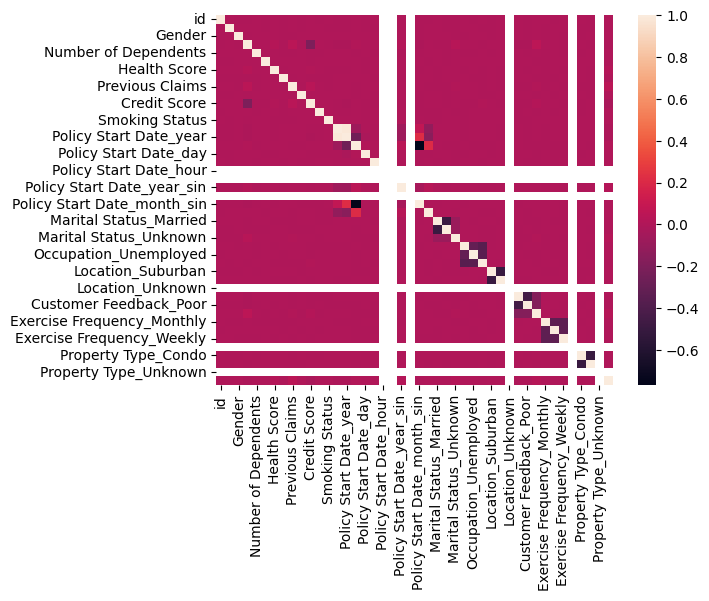

In [92]:
sns.heatmap(train_data.corr())

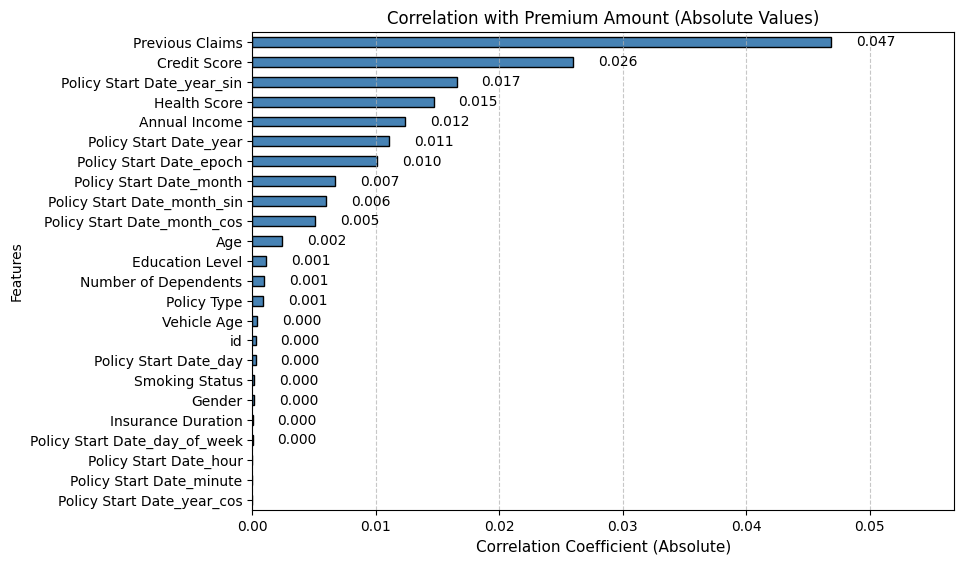

In [93]:
numeric_data = train_data.select_dtypes(include=['number']).copy()

correlation_matrix = numeric_data.corr()

correlation_with_target = correlation_matrix['Premium Amount'].drop('Premium Amount').abs()

correlation_with_target_sorted = correlation_with_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = correlation_with_target_sorted.plot(kind='barh', color='steelblue', edgecolor='black')

for index, value in enumerate(correlation_with_target_sorted):
    if not (pd.isna(value) or value == float('inf') or value == float('-inf')):
        plt.text(value + 0.002, index, f"{value:.3f}", va='center', fontsize=10)

ax.invert_yaxis()

max_value = correlation_with_target_sorted.max()
plt.xlim(0, max_value + 0.01)
plt.title(f"Correlation with Premium Amount (Absolute Values)", fontsize=12)
plt.xlabel("Correlation Coefficient (Absolute)", fontsize=11)
plt.ylabel("Features", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout(pad=2)
plt.show()

In [94]:
num_bottom_features = 20

lowest_features = correlation_with_target_sorted.tail(num_bottom_features).index.tolist()

print("Features to be dropped:")
for feature in lowest_features:
    print(feature)

train_data.drop(columns=lowest_features, inplace=True)
test_data.drop(columns=lowest_features, inplace=True)

Features to be dropped:
Annual Income
Policy Start Date_year
Policy Start Date_epoch
Policy Start Date_month
Policy Start Date_month_sin
Policy Start Date_month_cos
Age
Education Level
Number of Dependents
Policy Type
Vehicle Age
id
Policy Start Date_day
Smoking Status
Gender
Insurance Duration
Policy Start Date_day_of_week
Policy Start Date_hour
Policy Start Date_minute
Policy Start Date_year_cos


In [95]:
Y = np.log1p(train_data['Premium Amount'])
X = train_data.drop(columns=['Premium Amount'])

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=100)

model = RandomForestRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_val)
RMSLE = np.sqrt(mean_squared_error(Y_val, Y_pred))
RMSLE

1.1130221485318001

In [100]:
Y_test_pred_log = model.predict(test_data)
Y_test_pred = np.expm1(Y_test_pred_log)

submission = pd.DataFrame({'id': pd.read_csv('test.csv')['id'], 'Premium Amount': Y_test_pred})

submission.to_csv('submission.csv', index=False)

submission

,id,Premium Amount
0,1200000,753.486091
1,1200001,824.511296
2,1200002,323.265031
3,1200003,525.007333
4,1200004,396.272987
...,...,...
799995,1999995,926.644110
799996,1999996,566.996027
799997,1999997,620.660816
799998,1999998,785.299326
